In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import stats
%matplotlib inline

In [30]:
data = pd.read_csv('MNIST.csv')
data.head(1)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
cols = data.shape[1]

X = np.array(data.iloc[:,1:cols])
Y = np.array(data.iloc[:,0])

X.shape, Y.shape

((42000, 784), (42000,))

In [72]:
#Training Set, Test Set

num_train = 41000
num_test = 1000

X_train = X[:num_train]
Y_train = Y[:num_train]

X_test = X[num_train:num_train + num_test]
Y_test = Y[num_train:num_train + num_test]

X_train.shape, Y_train.shape  , X_test.shape, Y_test.shape          

((41000, 784), (41000,), (1000, 784), (1000,))

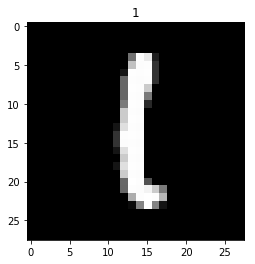

In [33]:
i = 5123

img = X[i]
img = img.reshape(28,28)
plt.imshow(img, cmap='gray')
plt.title(Y[i])

In [ ]:
#I will try messing around with the image later, first just given data, this is example of possible change in pixel values
'''
i = 29
X[i][X[i] >=128] = 255
X[i][X[i] <128] = 0

img = X[i]
img = img.reshape(28,28)
plt.imshow(img, cmap='gray')
plt.title(Y[0,i])
'''

In [34]:
def distance(X1, X2):
    
    test = X1.shape[0]
    train = X2.shape[0]
    
    dist = np.zeros((test, train))
    
    a2 = np.square(X1).sum(axis=1, keepdims=True)
    b2 = np.square(X2).sum(axis=1)
    ab = X1.dot(X2.T)
    
    dist = np.sqrt(a2 + b2 - 2*ab)
        
    return dist
    

In [63]:
def predict(dist, k=1):
    
    Y_pred = np.zeros(dist.shape[0])
    neighbours = np.zeros((dist.shape[0]))
    predictions = np.argsort(dist, axis=1)[:,:k]
    neighbours = Y_train[predictions]
    neighbours.sort(axis=1)
    
    Y_pred = stats.mode(neighbours,axis=1)[0].squeeze()
    
    
    
    return Y_pred
    

In [73]:
dist = distance(X_test, X_train)
labels = predict(dist, k=5)

In [74]:
np.sum(labels == Y_test)

972

In [75]:
np.mean(Y_test == labels)


0.97199999999999998

In [ ]:
#============================================================================================================================

In [ ]:
#using the classifier on a custom image

img = mpimg.imread('number.jpg')
img1 = np.dot(img, [0.299, 0.587, 0.114])
m = int(532 / 2)
digit = img1[m - 20 : m + 8 , m-14 : m+14]
plt.imshow(digit, cmap='gray_r'), digit.shape

In [ ]:
digit[digit < 128] = 0
digit[digit >= 128] = 255
digit = np.matrix(digit).reshape(28,28)
plt.imshow(digit, cmap='gray')

In [ ]:
digit = np.matrix(digit).reshape(-1)
dist = distance(digit, X_train)
prediction = predict(dist)
prediction

In [ ]:
label = Y[prediction]
label

In [ ]:
one = mpimg.imread('one.jpg')
two = mpimg.imread('two.jpg')
zero = mpimg.imread('zero.jpg')
five = mpimg.imread('five.jpg')
eight = mpimg.imread('eight.jpg')

numbers = [one, two, zero, five, eight]

for i in range(len(numbers)):
    numbers[i] = np.dot(numbers[i], [0.299, 0.587, 0.114])

[one, two, zero, five, eight] = numbers

In [ ]:
one.shape, two.shape, zero.shape, five.shape,eight.shape

In [ ]:
m = int(380 / 2)
digit = eight[m-18:m+10, m-15:m+13]
digit[digit < 128] = 0
digit[digit >= 128] = 255

In [ ]:
digit = digit.reshape(28,-1)
plt.imshow(digit, cmap='gray')

In [ ]:
digit = np.matrix(digit).reshape(-1)
dist1 = distance(digit, X_train)
prediction1 = predict(dist1)
prediction1

In [ ]:
label = Y[0,prediction1]
label